In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import HTML

In [2]:

import numpy as np
import os
import data_utils
import pickle
import attacks
import random
from keras.models import load_model

import greedy_utils

Using TensorFlow backend.


In [3]:
TOKENIZER_PATH = 'tokenizer.pickle'
TEXT_DATA_DIR = '20_newsgroup/'
MODEL_PATH = '20news_model.h5'

In [4]:
tokenizer, inverse_tokenizer = data_utils.load_tokenizer(TOKENIZER_PATH)
model = load_model(MODEL_PATH)
labels =  list(sorted(os.listdir(TEXT_DATA_DIR)))

In [5]:
sample_file, true_label = data_utils.pick_random_file(TEXT_DATA_DIR)
file_text = data_utils.load_textfile(sample_file)
file_features = data_utils.process_text(tokenizer, file_text)

In [6]:
pred_scores = model.predict(file_features)
orig_prediction = np.argmax(pred_scores[0])
print('TrueLabel = %s' %true_label)
print('Predicted "%s" with %f .' %(labels[orig_prediction], pred_scores[0][orig_prediction]))

TrueLabel = talk.politics.mideast
Predicted "talk.politics.mideast" with 0.283052 .


## Randomised Attack (Non-targeted)

 Random attack will pick and replace words randomly.

In [9]:
COMPUTE_PROBS = False
if COMPUTE_PROBS:
    num_words = len(inverse_tokenizer)
    topics_words, topics_words_probs = greedy_utils.compute_topic_words(TEXT_DATA_DIR, tokenizer, 
                                                                  labels, num_words)
    with open('topic_words.pickle', 'wb') as handle:
        pickle.dump(topics_words, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('topc_words_probs.pickle', 'wb') as handle:
        pickle.dump(topics_words_probs, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('topic_words.pickle', 'rb') as handle:
        topics_words = pickle.load(handle)
    with open('topc_words_probs.pickle', 'rb') as handle:
        topics_words_probs = pickle.load( handle)

In [68]:
greedy_attack = attacks.GreedyAttack(model, topics_words, topics_words_probs, temp=0.15)

In [69]:
other_labels = [x for x in range(len(labels)) if x != orig_prediction]
random_target = np.random.choice(other_labels)
print('Random target = %s' %labels[random_target])
x_orig = file_features.copy()
x_adv, o_hist, t_hist = greedy_attack.attack(x_orig, random_target)

Random target = rec.motorcycles


Attack succeeded after 108 iterations.
Original class: talk.politics.mideast, Attack class: rec.motorcycles
Number of changed words = 87 (28.16 %)


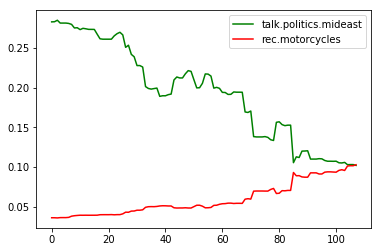

In [70]:
if x_adv is None:
    print('Attack failed. !')
else:
    adv_prediction = np.argmax(model.predict(x_adv))
    print('Attack succeeded after %d iterations.' %(len(t_hist)))
    print('Original class: %s, Attack class: %s' %(labels[orig_prediction], labels[adv_prediction]))
    print("Number of changed words = %d (%0.2f %%)"
          %(np.count_nonzero(x_adv != x_orig),
            100*(np.count_nonzero(x_adv != x_orig))/np.count_nonzero(x_orig)))
    plt.plot(o_hist, 'g', label=labels[orig_prediction])
    plt.plot(t_hist, 'r', label=labels[adv_prediction])
    plt.legend()

## Reconstruct Text Document

In [71]:
orig_text = data_utils.reconstruct_text(inverse_tokenizer, file_features[0])
adv_text = data_utils.reconstruct_text(inverse_tokenizer, x_adv[0])

## Visualize Attack

In [72]:
orig_html, adv_html = data_utils.render_attack(orig_text, adv_text)

In [73]:
HTML("<b> Original Text </b>")
HTML(orig_html)

In [74]:
HTML("<b> Adversarial Text </b>")
HTML(adv_html)

In [75]:
embeddings_index = {}
f = open(os.path.join('./glove.6B', 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [79]:
orig_words = topics_words[orig_prediction]

In [80]:
[np.count_nonzero(x_orig==x) for x in orig_words]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [99]:
orig_words

[19936,
 12139,
 12330,
 18281,
 15075,
 8843,
 14576,
 7749,
 3294,
 10065,
 7781,
 7513,
 16927,
 16852,
 15157,
 12213,
 18224,
 3301,
 17520,
 2811,
 10392,
 14785,
 17768,
 11106,
 1788,
 1746,
 10793,
 395,
 15291,
 15092,
 14588,
 6639,
 7347,
 16603,
 14494,
 614,
 14052,
 11194,
 9221,
 8338,
 2925,
 15700,
 4697,
 19091,
 3426,
 14447,
 17269,
 17508,
 10366,
 11800,
 5139,
 4484,
 16141,
 16368,
 3275,
 5469,
 19955,
 15195,
 9028,
 900,
 11795,
 14228,
 7687,
 2297,
 502,
 17892,
 18036,
 18151,
 17107,
 10635,
 961,
 6769,
 2694,
 5573,
 16356,
 1263,
 11236,
 9140,
 14880,
 705,
 2530,
 360,
 7335,
 235,
 8362,
 5737,
 275,
 3050,
 9373,
 19755,
 3958,
 7363,
 12038,
 7146,
 1879,
 11773,
 630,
 3731,
 11661,
 8509,
 1808,
 3837,
 6292,
 2489,
 3105,
 2484,
 1968,
 726,
 3329,
 8507,
 953,
 2435,
 13335,
 651,
 2880,
 7702,
 4591,
 3798,
 5634,
 934,
 7175,
 2159,
 2151,
 4618,
 6257,
 9874,
 9683,
 5608,
 8541,
 2115,
 3045,
 4175,
 6846,
 6777,
 5733,
 3262,
 5504,
 512

In [151]:
def pick_most_similar(src_word, target_words, inverse_tokenizer, embedding_index):
    cnt = 0
    shortest_dist = 100000000
    src_vector = embedding_index.get(inverse_tokenizer[src_word])
    ret = -1
    for w_idx in target_words:
        w = inverse_tokenizer[w_idx]
        embedding_vector = embeddings_index.get(w)
        if embedding_vector is not None:
            dist = np.sum((src_vector - embedding_vector)**2)
            print(inverse_tokenizer[w_idx], ' ' , dist)
            if dist < shortest_dist and dist != 0:
                shortest_dist = dist
                ret = w_idx
    return ret
    

In [172]:
src_word=630
ret_word = pick_most_similar(src_word, topics_words[9], inverse_tokenizer, embeddings_index)

larkin   72.4762
singer   76.9135
556   66.5995
coaches   62.4707
starter   82.3653
winning   67.529
slider   98.1598
signing   63.0209
terrific   50.5603
312   65.4402
kelly   59.0332
leland   82.3653
235   64.5958
ryan   65.2315
603   70.7411
623   67.7955
definately   79.2515
grandfather   66.9772
rank   68.4122
277   70.1416
weights   70.0475
signatures   69.8248
coin   81.8787
solid   46.6473
neal   72.5717
notified   54.4875
temper   71.416
eagle   77.1005
anderson   55.107
dire   64.1107
crowd   69.441
kosher   88.538
rivers   71.9827
compose   54.1091
picked   51.4954
aura   68.1304
85   51.5512
barnes   60.3199
occured   77.1009
shelley   77.2694
242   71.8637
top   60.5253
meddle   89.6228
cake   80.5523
lover   70.8233
winds   87.8259
karen   71.063
warren   63.6456
23   54.0045
replied   55.6222
impaired   64.7133
knock   62.2472
burns   66.724
during   50.7488
eventually   43.6346
doing   43.5463
boss   66.9041
flash   65.572
revenge   71.913
odd   58.3488
parking   56.455

In [173]:
inverse_tokenizer[ret_word]

'therefore'

In [174]:
inverse_tokenizer[src_word]

'provide'